C:\Users\Jon I\AppData\Local\pypoetry\Cache\virtualenvs\mia-aa-lab2-KKznYb66-py3.12\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Jon I\AppData\Local\pypoetry\Cache\virtualenvs\mia-aa-lab2-KKznYb66-py3.12\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Jon I\AppData\Local\pypoetry\Cache\virtualenvs\mia-aa-lab2-KKznYb66-py3.12\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Jon I\AppData\Local\pypoetry\Cache\virtualenvs\mia-aa-lab2-KKznYb66-py3.12\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB

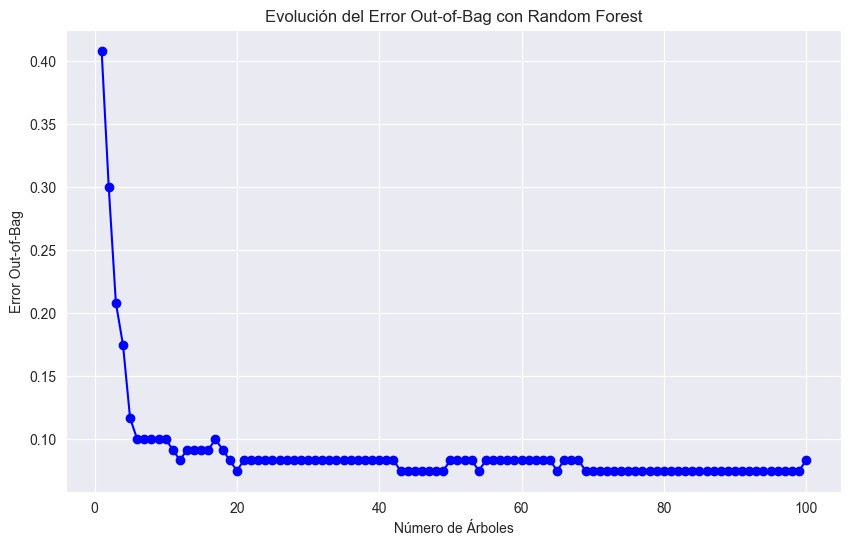

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar listas para almacenar el número de árboles y los errores OOB
n_trees_range = range(1, 101)  # Ajusta según sea necesario
n_trees_range
oob_errors = []

# Entrenar modelos con diferentes cantidades de árboles
for n_trees in n_trees_range:
    # Crear y entrenar el modelo Random Forest con n_trees árboles
    rf_model = RandomForestClassifier(n_estimators=n_trees, oob_score=True, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Obtener el error OOB y almacenarlo en la lista
    oob_error = 1 - rf_model.oob_score_
    oob_errors.append(oob_error)

# Visualizar la evolución del error OOB
plt.figure(figsize=(10, 6))
plt.plot(n_trees_range, oob_errors, marker='o', linestyle='-', color='b')
plt.title('Evolución del Error Out-of-Bag con Random Forest')
plt.xlabel('Número de Árboles')
plt.ylabel('Error Out-of-Bag')
plt.grid(True)
plt.show()

Exactitud del modelo Random Forest: 1.0


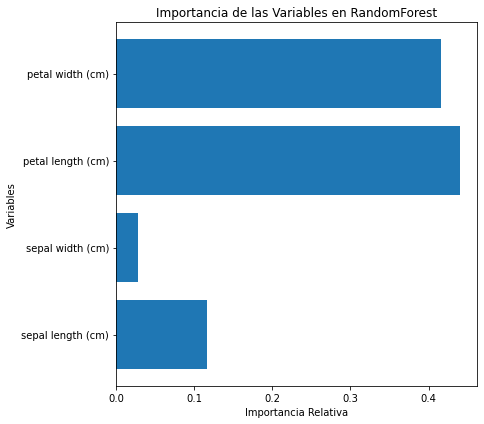

In [6]:
# Crear un modelo de RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=20, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo Random Forest: {accuracy}')


# Obtener importancias de las variables
importances_rf = rf_model.feature_importances_

# Obtener nombres de las variables
feature_names = iris.feature_names

# Visualizar importancias de las variables para RandomForest
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(range(len(importances_rf)), importances_rf, align='center')
plt.yticks(range(len(importances_rf)), feature_names)
plt.xlabel('Importancia Relativa')
plt.ylabel('Variables')
plt.title('Importancia de las Variables en RandomForest')


plt.tight_layout()
plt.show()

In [15]:
import joblib
# Guardar el modelo en un archivo
joblib.dump(rf_model, 'modelo_random_forest.joblib')

# ...

# Cargar el modelo desde el archivo
rf_model1 = joblib.load('modelo_random_forest.joblib')

nuevo_dato = [[5.1, 3.5, 1.4, 0.2]]

y_pred1 = rf_model1.predict(nuevo_dato)

y_pred1[0]

0